## Random Forests

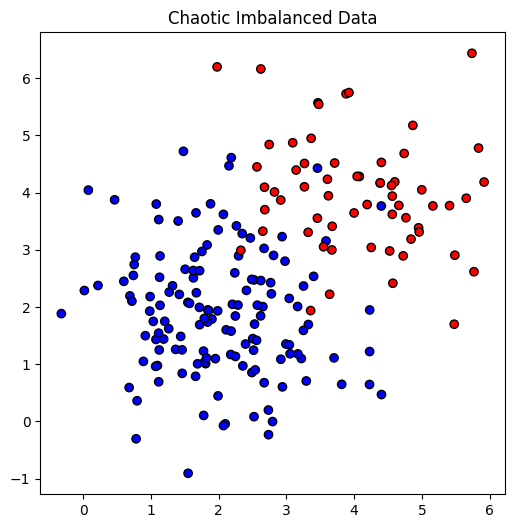

In [34]:
import random
import matplotlib.pyplot as plt

random.seed(0)
X = [(random.gauss(2,1), random.gauss(2,1)) for _ in range(140)] + \
    [(random.gauss(4,1), random.gauss(4,1)) for _ in range(60)]
y = [0]*140 + [1]*60

plt.figure(figsize=(6,6))
plt.scatter([p[0] for p in X], [p[1] for p in X], c=y, cmap='bwr', edgecolors='k')
plt.title('Chaotic Imbalanced Data')
plt.show()

In [35]:
data = list(zip(X, y))

random.shuffle(data)

n = int(0.8 * len(data))
train, test = data[:n], data[n:]

X_train, y_train = zip(*train)
X_test,  y_test  = zip(*test)

In [43]:
class DecisionTrees:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.direction = 1

    def fit(self, X, y):
        best_gini = float('inf')
        for feature in [0, 1]:
            
            values = sorted(set(x[feature] for x in X))
            for i in range(len(values) - 1):
                threshold = (values[i] + values[i+1]) / 2
                for direction in [1, -1]:
                    left = [y[j] for j, x in enumerate(X) if direction * (x[feature] - threshold) < 0]
                    right = [y[j] for j, x in enumerate(X) if direction * (x[feature] - threshold) >= 0]
                    
                    if not left or not right:
                        continue

                    def gini(group):
                        total = len(group)
                        return 1 - sum((group.count(c) / total) ** 2 for c in set(y))

                    total = len(X)
                    gini_score = (len(left)/total) * gini(left) + (len(right)/total) * gini(right)

                    if gini_score < best_gini:
                        best_gini = gini_score
                        self.feature_index = feature
                        self.threshold = threshold
                        self.direction = direction

    def predict(self, X):
        preds = []
        for x in X:
            value = x[self.feature_index]
            if self.direction * (value - self.threshold) >= 0:
                preds.append(1)
            else:
                preds.append(0)
        return preds

In [44]:
class RandomForests:
    def __init__(self, n_trees=10):
        self.n_trees = n_trees
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            sample = [random.choice(list(zip(X, y))) for _ in range(len(X))]
            Xs, ys = zip(*sample)
            stump = DecisionTrees()
            stump.fit(Xs, ys)
            self.trees.append(stump)

    def predict(self, X):
        all_preds = [tree.predict(X) for tree in self.trees]
        final = []
        for i in range(len(X)):
            votes = [preds[i] for preds in all_preds]
            final.append(max(set(votes), key=votes.count))
        return final

Test Accuracy: 85.00%


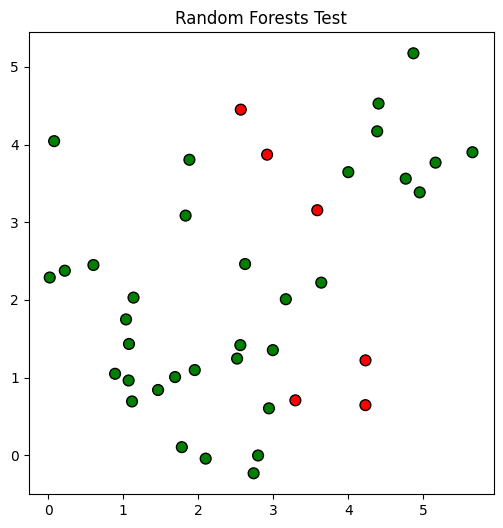

In [45]:
rf = RandomForests(n_trees=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = sum(yt==yp for yt, yp in zip(y_test, y_pred)) / len(y_test)
print(f"Test Accuracy: {accuracy:.2%}")

plt.figure(figsize=(6,6))
colors = ['green' if t==p else 'red' for t,p in zip(y_test, y_pred)]
plt.scatter([pt[0] for pt in X_test], [pt[1] for pt in X_test], c=colors, edgecolors='k', s=60)
plt.title('Random Forests Test')
plt.show()

### What we have understood:

As we can observe from `class RandomForests()`, Random Forests work by training multiple decision stumps (or trees), each on random samples of the original data — this technique is called bagging.
* Each stump votes on the predicted class, and the forest takes the majority vote.

That’s why it’s called an ensemble method: It combines many weak models into a strong one.
* This setup reduces overfitting and increases generalization, especially with noisy or unbalanced data.

Every tree sees a slightly different perspective of the data — and their combination is often surprisingly accurate.